In [1]:
import pandas as pd
import torch
from PIL import Image
import urllib.request

from lavis.models import load_model_and_preprocess

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]


## Read data

In [2]:
path = 'data/preprocessed_wit_1_percent.tsv'

In [3]:
df = pd.read_csv(path, sep='\t')
df

,Unnamed: 0,language,image_url,caption_reference_description
0,0,en,https://upload.wikimedia.org/wikipedia/commons...,Mount Ida and Azure Lake
1,1,en,https://upload.wikimedia.org/wikipedia/commons...,The boundaries of the Byzantine Empire under J...
2,2,en,https://upload.wikimedia.org/wikipedia/commons...,The east tower under construction in March 2019.
3,3,en,https://upload.wikimedia.org/wikipedia/commons...,U.S. professional golfer Nancy Lopez
4,4,en,https://upload.wikimedia.org/wikipedia/commons...,The chapel of Saint-Antoine
...,...,...,...,...
40225,40225,zh,https://upload.wikimedia.org/wikipedia/commons...,京都大学理学研究科附属地球热学研究所
40226,40226,zh,https://upload.wikimedia.org/wikipedia/commons...,位于首尔的韩国银行中央本部
40227,40227,zh,https://upload.wikimedia.org/wikipedia/commons...,市镇详图
40228,40228,zh,https://upload.wikimedia.org/wikipedia/commons...,南昌荟1楼


## Load BLIP-2 model

In [39]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

In [8]:
# loads BLIP-2 pre-trained model
model, vis_processors, _ = load_model_and_preprocess(name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device)

model-00001-of-00002.safetensors:  88%|########7 | 8.27G/9.45G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:01<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


  0%|                                                | 0.00/407M [00:00<?, ?B/s]
  0%|                                         | 128k/407M [00:00<12:30, 569kB/s]
  0%|                                         | 256k/407M [00:00<08:33, 832kB/s]
  0%|                                        | 640k/407M [00:00<03:58, 1.79MB/s]
  0%|▏                                      | 1.38M/407M [00:00<01:55, 3.69MB/s]
  1%|▎                                      | 3.00M/407M [00:00<00:54, 7.74MB/s]
  1%|▍                                      | 4.75M/407M [00:00<00:38, 10.9MB/s]
  2%|▋                                      | 6.75M/407M [00:00<00:30, 13.9MB/s]
  2%|▊                                      | 8.75M/407M [00:00<00:26, 16.0MB/s]
  3%|█                                      | 10.8M/407M [00:01<00:24, 17.3MB/s]
  3%|█▏                                     | 12.8M/407M [00:01<00:22, 18.3MB/s]
  4%|█▍                                     | 14.8M/407M [00:01<00:21, 18.9MB/s]
  4%|█▌                    

In [44]:
type(model)

lavis.models.blip2_models.blip2_t5.Blip2T5

## Generate example for English

In [4]:
example_img_url = df['image_url'][0]

example_img_path, _ = urllib.request.urlretrieve(example_img_url, 'images/example_img.jpg')

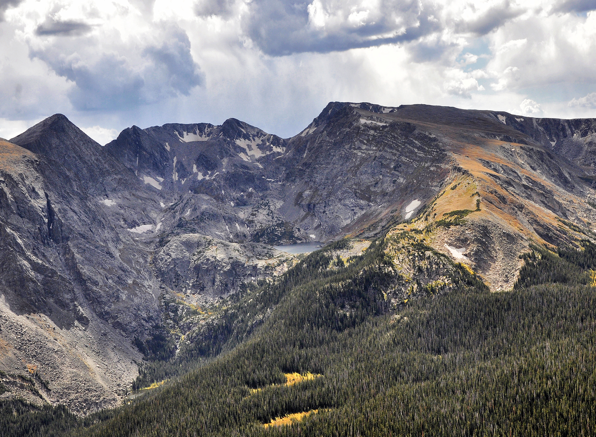

'Mount Ida and Azure Lake'

In [25]:
# load sample image
raw_image = Image.open(example_img_path).convert("RGB")
display(raw_image.resize((596, 437)))
df['caption_reference_description'][0]

In [9]:
# prepare the image
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [14]:
example_img_caption = model.generate({"image": image, "prompt": "On the picture:"})
example_img_caption

['a mountain range with trees and a lake']

## Generate example for German

In [46]:
df_de = df[df['language'] == 'de'].reset_index()
df_de

,index,Unnamed: 0,language,image_url,caption_reference_description
0,4023,4023,de,https://upload.wikimedia.org/wikipedia/commons...,Statue von Bernarda Morin in Santiago de Chile...
1,4024,4024,de,https://upload.wikimedia.org/wikipedia/commons...,John Singer Sargent: Porträt von William Merri...
2,4025,4025,de,https://upload.wikimedia.org/wikipedia/commons...,Die Porta Nigra in Trier ist eines der bekannt...
3,4026,4026,de,https://upload.wikimedia.org/wikipedia/commons...,Anne Haug – Siegerin 2017
4,4027,4027,de,http://upload.wikimedia.org/wikipedia/commons/...,Lage der Region in Alberta
...,...,...,...,...,...
4018,8041,8041,de,https://upload.wikimedia.org/wikipedia/commons...,Detailaufnahme Werk Neumünster
4019,8042,8042,de,https://upload.wikimedia.org/wikipedia/commons...,"Windkraftanlagen in Parnaíba, Piauí"
4020,8043,8043,de,https://upload.wikimedia.org/wikipedia/commons...,Logo des SR DRS bis 2007
4021,8044,8044,de,https://upload.wikimedia.org/wikipedia/commons...,Umriss und Querschnitt der fossilführenden Kar...


In [47]:
example_img_url_de = df_de['image_url'][0]

example_img_path_de, _ = urllib.request.urlretrieve(example_img_url_de, 'images/example_img_de.jpg')

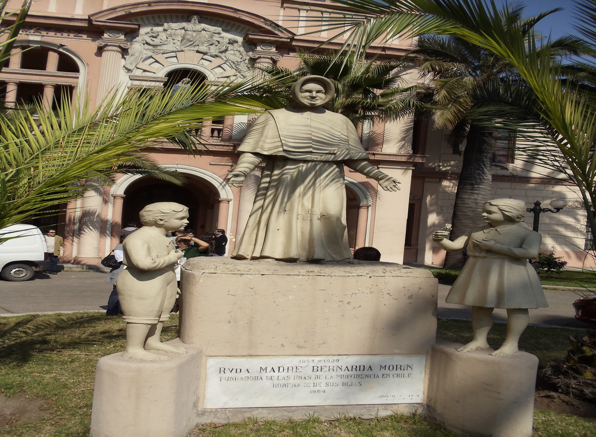

'Statue von Bernarda Morin in Santiago de Chile vor der Kirche ihrer Kongregation'

In [48]:
# load sample image
raw_image_de = Image.open(example_img_path_de).convert("RGB")
display(raw_image_de.resize((596, 437)))
df_de['caption_reference_description'][0]

In [49]:
# prepare the image
image_de = vis_processors["eval"](raw_image_de).unsqueeze(0).to(device)

In [50]:
example_img_caption_de = model.generate({"image": image_de, "prompt": "Auf dem Bild:"})
example_img_caption_de

['a statue of st. francis of assisi in front of a building']

## Generate example for Russian

In [37]:
df_ru = df[df['language'] == 'ru'].reset_index()
df_ru

,index,Unnamed: 0,language,image_url,caption_reference_description
0,24138,24138,ru,https://upload.wikimedia.org/wikipedia/commons...,Дом на улице Кецховели в Баку (ныне улица имен...
1,24139,24139,ru,https://upload.wikimedia.org/wikipedia/commons...,Савиола празднует гол в составе «Бенфики»
2,24140,24140,ru,https://upload.wikimedia.org/wikipedia/commons...,Косой капонир
3,24141,24141,ru,https://upload.wikimedia.org/wikipedia/commons...,"Каменноостровский пр., 31-33."
4,24142,24142,ru,https://upload.wikimedia.org/wikipedia/commons...,Велогонка в 2018 году
...,...,...,...,...,...
4018,28156,28156,ru,https://upload.wikimedia.org/wikipedia/commons...,Герб
4019,28157,28157,ru,https://upload.wikimedia.org/wikipedia/commons...,Интерьер музея
4020,28158,28158,ru,https://upload.wikimedia.org/wikipedia/commons...,Расположение села (с/а) Акуаскиа
4021,28159,28159,ru,https://upload.wikimedia.org/wikipedia/commons...,Скелеты некоторых динозавров.\n1-й ряд (сверху...


In [38]:
example_img_url_ru = df_ru['image_url'][0]

example_img_path_ru, _ = urllib.request.urlretrieve(example_img_url_ru, 'images/example_img_ru.jpg')

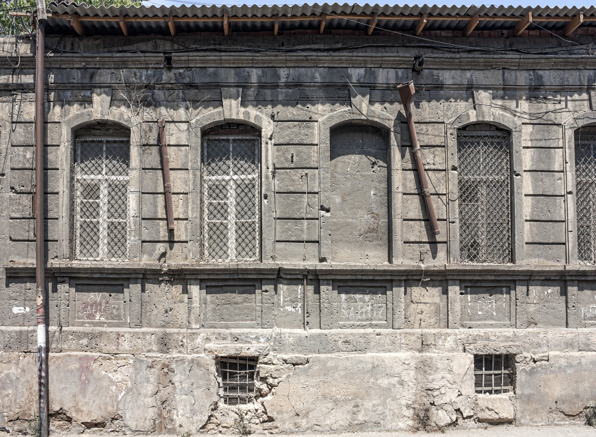

'Дом на улице Кецховели в Баку (ныне улица имени Академика Шамиля Азизбекова)'

In [41]:
# load sample image
raw_image_ru = Image.open(example_img_path_ru).convert("RGB")
display(raw_image_ru.resize((596, 437)))
df_ru['caption_reference_description'][0]

In [42]:
# prepare the image
image_ru = vis_processors["eval"](raw_image_ru).unsqueeze(0).to(device)

In [43]:
example_img_caption_ru = model.generate({"image": image_ru, "prompt": "На картинке:"})
example_img_caption_ru

['а картинке: а картинке: а картин']

# Results Evaluation

In [12]:
from rouge_score import rouge_scorer

In [13]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

In [16]:
df['caption_reference_description'][0]

'Mount Ida and Azure Lake'

In [17]:
scores = scorer.score(df['caption_reference_description'][0], example_img_caption[0])
for key in scores:
    print(f'{key}: {scores[key]}')

rouge1: Score(precision=0.25, recall=0.4, fmeasure=0.3076923076923077)
rouge2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
rougeL: Score(precision=0.25, recall=0.4, fmeasure=0.3076923076923077)
